In [11]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import csv
import json
import pandas as pd
import math
import statistics

In [12]:
stats = {}

## Measured job load

In [13]:
csvfile = open('../cirrus-cpu-simple-rigid/data/raw-job-data/raw_job_statistics.csv', 'r')

csvreader = csv.DictReader(csvfile)
measured_job_l = []
maxtime = 0
for row in csvreader:
    if int(row['End Time']) > maxtime:
        maxtime = int(row['End Time'])
    if row['Nodes'] is None:
        print(row)
    measured_job_l.append(row)

measured_job_df = pd.DataFrame(measured_job_l)

print(measured_job_df)

measured_job_df['Start Time'] = measured_job_df['Start Time'].astype(int)
measured_job_df['Wait Time'] = measured_job_df['Wait Time'].astype(int)
measured_job_df['Nodes'] = measured_job_df['Nodes'].astype(int)
measured_job_df['Makespan'] = measured_job_df['Makespan'].astype(int)
measured_job_df['Turnaround Time'] = measured_job_df['Turnaround Time'].astype(int)
measured_job_df['Coreh'] = measured_job_df['Makespan'] * measured_job_df['Nodes'] / 3600.0
measured_job_df['Efficiency'] = measured_job_df['Makespan'] / measured_job_df['Turnaround Time']

print(measured_job_df)

print(measured_job_df['Coreh'].sum())

print(maxtime)

          ID   Type Submit Time Start Time End Time Wait Time Makespan  \
0          0  Rigid           0       2984     4407      2984     1423   
1          1  Rigid         715       3839     4287      3124      448   
2          2  Rigid         715       3839     4311      3124      472   
3          3  Rigid         715       4288     4708      3573      420   
4          4  Rigid        1698       4408     5886      2710     1478   
...      ...    ...         ...        ...      ...       ...      ...   
11630  11630  Rigid       23977      24094    24923       117      829   
11631  11631  Rigid       23980      23982    24011         2       29   
11632  11632  Rigid       23983      24792    25818       809     1026   
11633  11633  Rigid       23983      24804    25757       821      953   
11634  11634  Rigid       23983      24804    24894       821       90   

      Turnaround Time     Status Nodes  
0                4407  completed   756  
1                3572  comple

In [14]:
measured_load_a = np.zeros(maxtime+1, dtype=int)
totuse = 0
for job in measured_job_l:
    temp_a = np.zeros(maxtime+1, dtype=int)
    istart = int(job['Start Time'])
    iend = int(job['End Time'])
    nodes = int(job['Nodes'])
    totuse = totuse + int(job['Makespan'])
    temp_a[istart:iend] = nodes
    measured_load_a = measured_load_a + temp_a

print(totuse)

4075948


<Figure size 640x480 with 0 Axes>

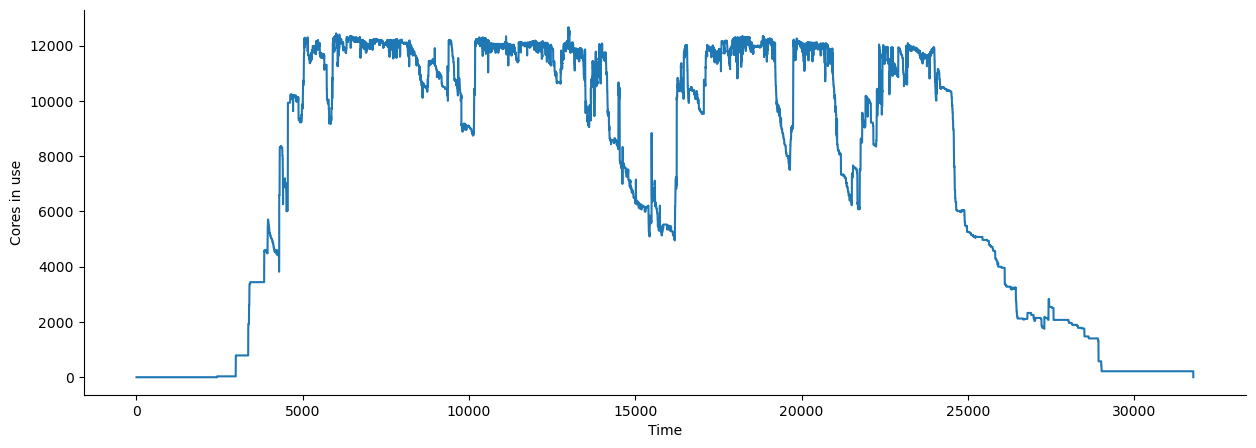

In [15]:
plt.clf()
plt.figure(figsize=(15, 5))
plt.plot(measured_load_a)
plt.xlabel("Time")
plt.ylabel("Cores in use")
sns.despine()
# plt.savefig("measured_load.png")

In [16]:
nCoreTot = 13248
timeLower = 5000
timeUpper= 23000
maxUsage = (timeUpper - timeLower) * nCoreTot

# Descriptive statistics
type = 'Measured'
stats[type] = {}

stats[type]['nJobStart'] = sum((measured_job_df['Start Time'] >= timeLower) & (measured_job_df['Start Time'] <= timeUpper))

print(f"Job data:")
print(f"    nJobs = {stats[type]['nJobStart']}")

stats[type]['minLoad'] = min(measured_load_a[timeLower:timeUpper+1])
stats[type]['maxLoad'] = max(measured_load_a[timeLower:timeUpper+1])
stats[type]['medianLoad'] = statistics.median(measured_load_a[timeLower:timeUpper+1])
stats[type]['meanLoad'] = statistics.mean(measured_load_a[timeLower:timeUpper+1])

usageVal = sum(measured_load_a[timeLower:timeUpper+1])
stats[type]['usageIncluded'] = usageVal / 3600.0
stats[type]['usageExcluded'] = sum(measured_load_a[0:timeLower]) + sum(measured_load_a[timeUpper:]) / 3600.0
stats[type]['usageFraction'] = usageVal/maxUsage
stats[type]['residualWork'] = sum(measured_load_a[timeUpper+1:]) / 3600

print(f"Load statistics:")
print(f"           min = {stats[type]['minLoad']}")
print(f"        median = {stats[type]['medianLoad']}")
print(f"           max = {stats[type]['maxLoad']}")
print(f"          mean = {stats[type]['meanLoad']}")
print(f"        %usage = {100 * stats[type]['usageFraction']}")
print(f" residual work = {stats[type]['residualWork']}")

measured_slice_df = measured_job_df.loc[(measured_job_df['Start Time'] >= timeLower) & (measured_job_df['Start Time'] <= timeUpper)]
stats[type]['minWait'] = measured_slice_df['Wait Time'].min()
stats[type]['medianWait'] = measured_slice_df['Wait Time'].median()
stats[type]['maxWait'] = measured_slice_df['Wait Time'].max()
stats[type]['meanWait'] = measured_slice_df['Wait Time'].mean()

print(f"Wait time statistics:")
print(f"    min = {stats[type]['minWait']}")
print(f" median = {stats[type]['medianWait']}")
print(f"    max = {stats[type]['maxWait']}")
print(f"   mean = {stats[type]['meanWait']}")

stats[type]['minTurnaroundTime'] = measured_slice_df['Turnaround Time'].min()
stats[type]['medianTurnaroundTime'] = measured_slice_df['Turnaround Time'].median()
stats[type]['maxTurnaroundTime'] = measured_slice_df['Turnaround Time'].max()
stats[type]['meanTurnaroundTime'] = measured_slice_df['Turnaround Time'].mean()

print(f"Total job time statistics:")
print(f"    min = {stats[type]['minTurnaroundTime']}")
print(f" median = {stats[type]['medianTurnaroundTime']}")
print(f"    max = {stats[type]['maxTurnaroundTime']}")
print(f"   mean = {stats[type]['meanTurnaroundTime']}")



Job data:
    nJobs = 10749
Load statistics:
           min = 4949
        median = 11698
           max = 12664
          mean = 10677
        %usage = 80.60183465848094
 residual work = 8924.3975
Wait time statistics:
    min = 0
 median = 0.0
    max = 4255
   mean = 103.41752721183366
Total job time statistics:
    min = 1
 median = 36.0
    max = 12102
   mean = 437.3735231184296


## Simulated job load (rigid)

In [17]:
csvfile = open('../cirrus-cpu-simple-rigid/data/output/job_statistics.csv', 'r')

csvreader = csv.DictReader(csvfile)
rigid_job_l = []
for row in csvreader:
    rigid_job_l.append(row)




In [18]:
jsonfile = open('../cirrus-cpu-simple-rigid/data/input/2024_Q1_CPU-jobs.json', 'r')
jobs_d = json.load(jsonfile)
i = 0
maxtime = 0
totuse = 0
for job in jobs_d['jobs']:
    rigid_job_l[i]['Nodes'] = int(job['num_nodes'])
    rigid_job_l[i]['JobID'] = job['arguments']['jobid']
    totuse = totuse + float(rigid_job_l[i]['Makespan']) * rigid_job_l[i]['Nodes']
    if float(rigid_job_l[i]['End Time']) > maxtime:
        maxtime = math.ceil(float(rigid_job_l[i]['End Time']))
    i += 1

rigid_job_df = pd.DataFrame(rigid_job_l)
rigid_job_df['Start Time'] = rigid_job_df['Start Time'].astype(int)
rigid_job_df['Wait Time'] = rigid_job_df['Wait Time'].astype(float)
rigid_job_df['Nodes'] = rigid_job_df['Nodes'].astype(int)
rigid_job_df['Makespan'] = rigid_job_df['Makespan'].astype(int)
rigid_job_df['Turnaround Time'] = rigid_job_df['Turnaround Time'].astype(int)
rigid_job_df['Coreh'] = rigid_job_df['Makespan'] * rigid_job_df['Nodes'] / 3600.0
rigid_job_df['Efficiency'] = rigid_job_df['Makespan'] / rigid_job_df['Turnaround Time']

print(rigid_job_df)

print(rigid_job_df['Coreh'].sum())

          ID   Type Submit Time  Start Time End Time  Wait Time  Makespan  \
0          0  rigid           0           0     1423        0.0      1423   
1          1  rigid         715         715     1163        0.0       448   
2          2  rigid         715         715     1187        0.0       472   
3          3  rigid         715         715     1135        0.0       420   
4          4  rigid        1698        1698     3176        0.0      1478   
...      ...    ...         ...         ...      ...        ...       ...   
11630  11630  rigid       23977       24071    24900       94.0       829   
11631  11631  rigid       23980       24140    24169      160.0        29   
11632  11632  rigid       23983       24141    25167      158.0      1026   
11633  11633  rigid       23983       24141    25094      158.0       953   
11634  11634  rigid       23983       24141    24231      158.0        90   

       Turnaround Time     Status  Nodes      JobID   Coreh  Efficiency  
0

In [19]:
rigid_load_a = np.zeros(maxtime+1, dtype=int)

In [20]:
for job in rigid_job_l:
    temp_a = np.zeros(maxtime+1, dtype=int)
    istart = math.floor(float(job['Start Time']))
    iend = math.ceil(float(job['End Time']))
    nodes = int(job['Nodes'])
    temp_a[istart:iend] = nodes
    rigid_load_a = rigid_load_a + temp_a

print(rigid_load_a)

[756 756 756 ... 216 216   0]


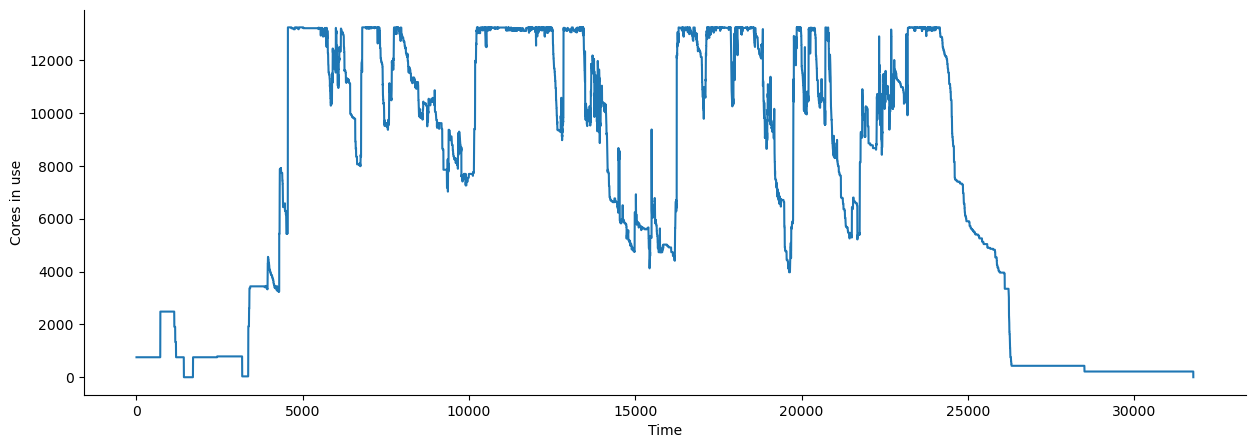

In [21]:
plt.figure(figsize=(15, 5))
plt.plot(rigid_load_a)
plt.xlabel("Time")
plt.ylabel("Cores in use")
sns.despine()
# plt.savefig("simulated_load_rigid.png")

In [22]:
nCoreTot = 13248
timeLower = 5000
timeUpper= 23000
maxUsage = (timeUpper - timeLower) * nCoreTot

# Descriptive statistics
type = 'Rigid'
stats[type] = {}


stats[type]['nJobStart'] = sum((rigid_job_df['Start Time'] >= timeLower) & (rigid_job_df['Start Time'] <= timeUpper))

print(f"Job data:")
print(f"    nJobs = {stats['Measured']['nJobStart']}")

stats[type]['minLoad'] = min(rigid_load_a[timeLower:timeUpper+1])
stats[type]['maxLoad'] = max(rigid_load_a[timeLower:timeUpper+1])
stats[type]['medianLoad'] = statistics.median(rigid_load_a[timeLower:timeUpper+1])
stats[type]['meanLoad'] = statistics.mean(rigid_load_a[timeLower:timeUpper+1])

usageVal = sum(rigid_load_a[timeLower:timeUpper+1])
stats[type]['usageIncluded'] = usageVal / 3600.0
stats[type]['usageExcluded'] = sum(rigid_load_a[0:timeLower]) + sum(rigid_load_a[timeUpper:]) / 3600.0
stats[type]['usageFraction'] = usageVal/maxUsage
stats[type]['residualWork'] = sum(rigid_load_a[timeUpper+1:]) / 3600

print(f"Load statistics:")
print(f"           min = {stats[type]['minLoad']}")
print(f"        median = {stats[type]['medianLoad']}")
print(f"           max = {stats[type]['maxLoad']}")
print(f"          mean = {stats[type]['meanLoad']}")
print(f"        %usage = {100 * stats[type]['usageFraction']}")
print(f" residual work = {stats[type]['residualWork']}")

rigid_slice_df = rigid_job_df.loc[(rigid_job_df['Start Time'] >= timeLower) & (rigid_job_df['Start Time'] <= timeUpper)]
stats[type]['minWait'] = rigid_slice_df['Wait Time'].min()
stats[type]['medianWait'] = rigid_slice_df['Wait Time'].median()
stats[type]['maxWait'] = rigid_slice_df['Wait Time'].max()
stats[type]['meanWait'] = rigid_slice_df['Wait Time'].mean()



print(f"Wait time statistics:")
print(f"    min = {stats[type]['minWait']}")
print(f" median = {stats[type]['medianWait']}")
print(f"    max = {stats[type]['maxWait']}")
print(f"   mean = {stats[type]['meanWait']}")

stats[type]['minTurnaroundTime'] = rigid_slice_df['Turnaround Time'].min()
stats[type]['medianTurnaroundTime'] = rigid_slice_df['Turnaround Time'].median()
stats[type]['maxTurnaroundTime'] = rigid_slice_df['Turnaround Time'].max()
stats[type]['meanTurnaroundTime'] = rigid_slice_df['Turnaround Time'].mean()

print(f"Total job time statistics:")
print(f"    min = {stats[type]['minTurnaroundTime']}")
print(f" median = {stats[type]['medianTurnaroundTime']}")
print(f"    max = {stats[type]['maxTurnaroundTime']}")
print(f"   mean = {stats[type]['meanTurnaroundTime']}")



Job data:
    nJobs = 10749
Load statistics:
           min = 3974
        median = 11252
           max = 13249
          mean = 10583
        %usage = 79.8930022980408
 residual work = 8425.5875
Wait time statistics:
    min = -1.92813e-10
 median = 48.0
    max = 1336.0
   mean = 160.29503453424945
Total job time statistics:
    min = 1
 median = 213.0
    max = 12619
   mean = 495.71961918984505


## Moldable jobs

In [23]:
csvfile = open('../cirrus-cpu-simple-moldable/data/output/job_statistics.csv', 'r')

csvreader = csv.DictReader(csvfile)
moldable_job_l = []
for row in csvreader:
    moldable_job_l.append(row)


print(moldable_job_l[0])
print(moldable_job_l[-1])


{'ID': '0', 'Type': 'moldable', 'Submit Time': '0', 'Start Time': '0', 'End Time': '711.5', 'Wait Time': '0', 'Makespan': '711.5', 'Turnaround Time': '711.5', 'Status': 'completed'}
{'ID': '11634', 'Type': 'moldable', 'Submit Time': '23983', 'Start Time': '24242.5', 'End Time': '24287.5', 'Wait Time': '259.5', 'Makespan': '45', 'Turnaround Time': '304.5', 'Status': 'completed'}


In [24]:
jsonfile = open('../cirrus-cpu-simple-moldable/data/input/2024_Q1_CPU-jobs_moldable.json', 'r')
jobs_d = json.load(jsonfile)
i = 0
maxtime = 0
totuse = 0
jobid_l = []
for job in jobs_d['jobs']:
    jobid_l.append(job['arguments']['jobid'])
    moldable_job_l[i]['JobID'] = job['arguments']['jobid']
    moldable_job_l[i]['BaseNodes'] = int(job['arguments']['base_nodes'])
    moldable_job_l[i]['MinNodes'] = int(job['num_nodes_min'])
    moldable_job_l[i]['MaxNodes'] = int(job['num_nodes_max'])
    i += 1


In [25]:
nodedata_df = pd.read_csv('../cirrus-cpu-simple-moldable/data/output/node_utilization.csv')
nodedata_df['Count'] = 1
nodedata_df.tail()

,Time,Node,State,Running jobs,Expected jobs,Count
1538754,28988.0,CCPU_11115,free,none,none,1
1538755,28988.0,CCPU_11116,free,none,none,1
1538756,28988.0,CCPU_11117,free,none,none,1
1538757,28988.0,CCPU_11118,free,none,none,1
1538758,28988.0,CCPU_11119,free,none,none,1


In [26]:
# nodecount_grouped = nodedata_df.groupby(by='Running jobs')['Count'].sum()
nodecount_grouped = nodedata_df.loc[nodedata_df['State'] == 'allocated'].groupby(by='Running jobs', sort=False)['Running jobs'].count()

In [27]:

for i, job in enumerate(moldable_job_l):
    cores = nodecount_grouped.iloc[i]
    moldable_job_l[i]['Nodes'] = cores
    totuse = totuse + float(moldable_job_l[i]['Makespan']) * moldable_job_l[i]['Nodes']
    if float(moldable_job_l[i]['End Time']) > maxtime:
        maxtime = math.ceil(float(moldable_job_l[i]['End Time']))

moldable_job_df = pd.DataFrame(moldable_job_l)
moldable_job_df['Start Time'] = moldable_job_df['Start Time'].astype(float)
moldable_job_df['Wait Time'] = moldable_job_df['Wait Time'].astype(float)
moldable_job_df['Nodes'] = moldable_job_df['Nodes'].astype(int)
moldable_job_df['Makespan'] = moldable_job_df['Makespan'].astype(float)
moldable_job_df['Coreh'] = moldable_job_df['Makespan'] * moldable_job_df['Nodes'] / 3600.0
moldable_job_df['Turnaround Time'] = moldable_job_df['Turnaround Time'].astype(float)
moldable_job_df['Efficiency'] = moldable_job_df['Makespan'] / moldable_job_df['Turnaround Time']
print(moldable_job_df)

print(moldable_job_df['Coreh'].sum())

          ID      Type Submit Time  Start Time End Time  Wait Time  Makespan  \
0          0  moldable           0         0.0    711.5        0.0     711.5   
1          1  moldable         715       715.0      939        0.0     224.0   
2          2  moldable         715       715.0      951        0.0     236.0   
3          3  moldable         715       715.0      925        0.0     210.0   
4          4  moldable        1698      1698.0     2437        0.0     739.0   
...      ...       ...         ...         ...      ...        ...       ...   
11630  11630  moldable       23977     24238.5    25482      261.5    1243.5   
11631  11631  moldable       23980     24240.0  24254.5      260.0      14.5   
11632  11632  moldable       23983     24242.5  24755.5      259.5     513.0   
11633  11633  moldable       23983     24242.5    24719      259.5     476.5   
11634  11634  moldable       23983     24242.5  24287.5      259.5      45.0   

       Turnaround Time     Status      

In [28]:
nrigid = len(moldable_job_df.loc[moldable_job_df['Nodes'] == moldable_job_df['BaseNodes']])
nmoldable = len(moldable_job_df.loc[moldable_job_df['Nodes'] != moldable_job_df['BaseNodes']])
nlarger = len(moldable_job_df.loc[moldable_job_df['Nodes'] > moldable_job_df['BaseNodes']])
nsmaller = len(moldable_job_df.loc[moldable_job_df['Nodes'] < moldable_job_df['BaseNodes']])
ntot = len(moldable_job_df)

print(f'Number of jobs at original size = {nrigid}/{ntot} ({100*nrigid/ntot:.2f}%)')
print(f'Number of jobs molded = {nmoldable}/{ntot} ({100*nmoldable/ntot:.2f}%)')
print(f'Number of jobs larger = {nlarger}/{ntot} ({100*nlarger/ntot:.2f}%)')
print(f'Number of jobs smaller = {nsmaller}/{ntot} ({100*nsmaller/ntot:.2f}%)')

Number of jobs at original size = 510/11635 (4.38%)
Number of jobs molded = 11125/11635 (95.62%)
Number of jobs larger = 10158/11635 (87.31%)
Number of jobs smaller = 967/11635 (8.31%)


In [29]:
moldable_load_a = np.zeros(maxtime+1, dtype=int)
for job in moldable_job_l:
    temp_a = np.zeros(maxtime+1, dtype=int)
    istart = math.floor(float(job['Start Time']))
    iend = math.ceil(float(job['End Time']))
    nodes = int(job['Nodes'])
    temp_a[istart:iend] = nodes
    moldable_load_a = moldable_load_a + temp_a

# With the moldable jobs, start and end times can be fractional
# This means that when they are floor'd and ceil'd you can end
# up with times where the load exceeds the number of cores available.
# Rather than doing something intelligent, we clip the array so it is
# in the correct range
moldable_load_a = np.clip(moldable_load_a, a_min=0, a_max=nCoreTot)

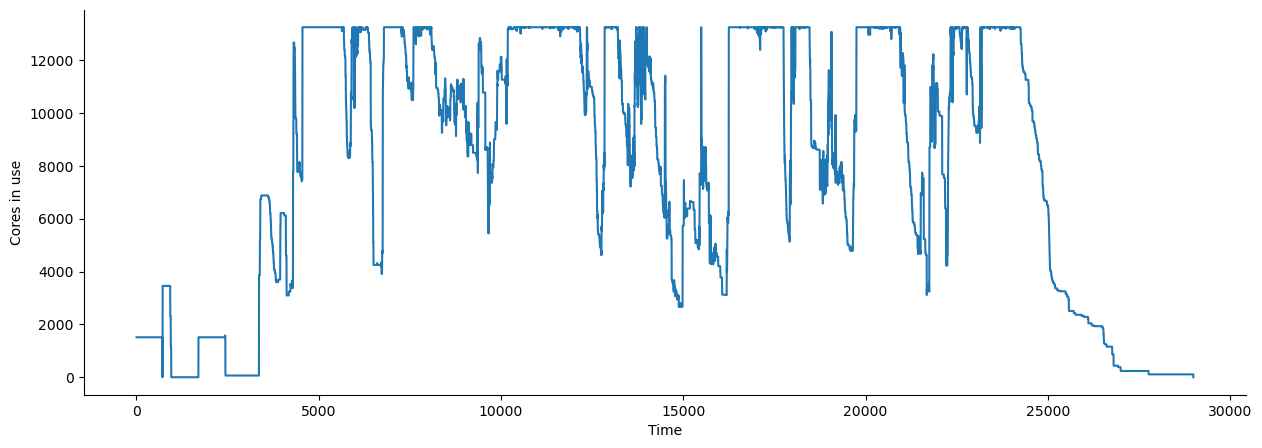

In [30]:
plt.figure(figsize=(15, 5))
plt.plot(moldable_load_a)
plt.xlabel("Time")
plt.ylabel("Cores in use")
sns.despine()
# plt.savefig("simulated_load_moldable.png")

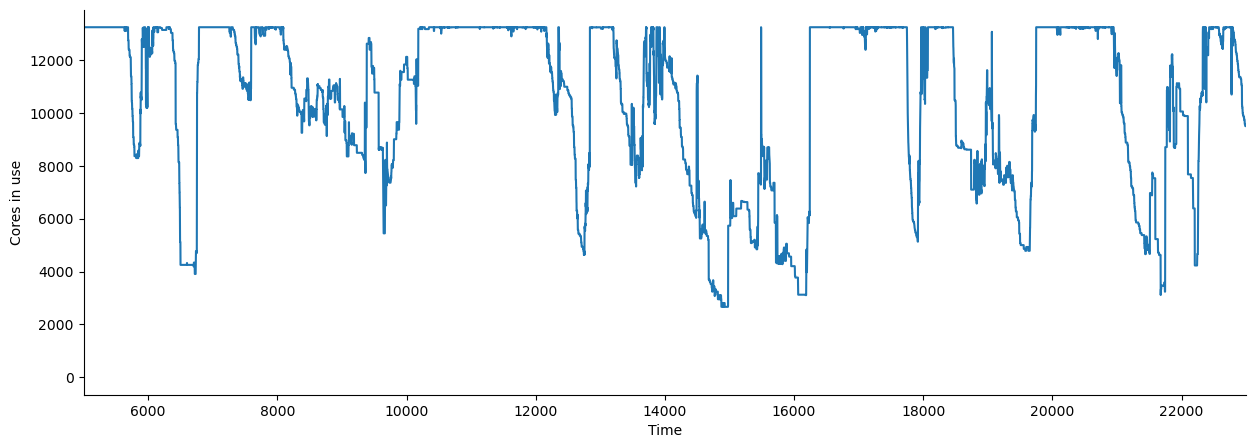

In [31]:
plt.figure(figsize=(15, 5))
plt.plot(moldable_load_a)
plt.xlabel("Time")
plt.ylabel("Cores in use")
plt.xlim([5000,23000])
sns.despine()

In [32]:
nCoreTot = 13248
timeLower = 5000
timeUpper= 23000
maxUsage = (timeUpper - timeLower) * nCoreTot

# Descriptive statistics
type = 'Moldable'
stats[type] = {}


stats[type]['nJobStart'] = sum((moldable_job_df['Start Time'] >= timeLower) & (moldable_job_df['Start Time'] <= timeUpper))

print(f"Job data:")
print(f"    nJobs = {stats[type]['nJobStart']}")

stats[type]['minLoad'] = min(moldable_load_a[timeLower:timeUpper+1])
stats[type]['maxLoad'] = max(moldable_load_a[timeLower:timeUpper+1])
stats[type]['medianLoad'] = statistics.median(moldable_load_a[timeLower:timeUpper+1])
stats[type]['meanLoad'] = statistics.mean(moldable_load_a[timeLower:timeUpper+1])

usageVal = sum(moldable_load_a[timeLower:timeUpper+1])
stats[type]['usageIncluded'] = usageVal / 3600.0
stats[type]['usageExcluded'] = sum(moldable_load_a[0:timeLower]) + sum(moldable_load_a[timeUpper:]) / 3600.0
stats[type]['usageFraction'] = usageVal/maxUsage
stats[type]['residualWork'] = sum(moldable_load_a[timeUpper+1:]) / 3600

print(f"Load statistics:")
print(f"           min = {stats[type]['minLoad']}")
print(f"        median = {stats[type]['medianLoad']}")
print(f"           max = {stats[type]['maxLoad']}")
print(f"          mean = {stats[type]['meanLoad']}")
print(f"        %usage = {100 * stats[type]['usageFraction']}")
print(f" residual work = {stats[type]['residualWork']}")

moldable_slice_df = moldable_job_df.loc[(moldable_job_df['Start Time'] >= timeLower) & (moldable_job_df['Start Time'] <= timeUpper)]
stats[type]['minWait'] = moldable_slice_df['Wait Time'].min()
stats[type]['medianWait'] = moldable_slice_df['Wait Time'].median()
stats[type]['maxWait'] = moldable_slice_df['Wait Time'].max()
stats[type]['meanWait'] = moldable_slice_df['Wait Time'].mean()



print(f"Wait time statistics:")
print(f"    min = {stats[type]['minWait']}")
print(f" median = {stats[type]['medianWait']}")
print(f"    max = {stats[type]['maxWait']}")
print(f"   mean = {stats[type]['meanWait']}")

stats[type]['minTurnaroundTime'] = moldable_slice_df['Turnaround Time'].min()
stats[type]['medianTurnaroundTime'] = moldable_slice_df['Turnaround Time'].median()
stats[type]['maxTurnaroundTime'] = moldable_slice_df['Turnaround Time'].max()
stats[type]['meanTurnaroundTime'] = moldable_slice_df['Turnaround Time'].mean()

print(f"Total job time statistics:")
print(f"    min = {stats[type]['minTurnaroundTime']}")
print(f" median = {stats[type]['medianTurnaroundTime']}")
print(f"    max = {stats[type]['maxTurnaroundTime']}")
print(f"   mean = {stats[type]['meanTurnaroundTime']}")



Job data:
    nJobs = 10742
Load statistics:
           min = 2664
        median = 11892
           max = 13248
          mean = 10605
        %usage = 80.05524020397209
 residual work = 7738.5725
Wait time statistics:
    min = -8.36735e-11
 median = 68.0604
    max = 988.0
   mean = 127.71315737084326
Total job time statistics:
    min = 0.5
 median = 146.89499999999998
    max = 12615.5
   mean = 336.99448259932973


## Comparisons

In [33]:
print(f"|              Stat |       Measured |     Rigid Sim. |  Moldable Sim. |")
print(f"|-------------------|----------------|----------------|----------------|")
print(f"| General stats     |                |                |                |")
print(f"|    Usage fraction | {stats['Measured']['usageFraction']:14.4f} | {stats['Rigid']['usageFraction']:14.4f} | {stats['Moldable']['usageFraction']:14.4f} |")
print(f"|             Coreh | {stats['Measured']['usageIncluded']:14.0f} | {stats['Rigid']['usageIncluded']:14.0f} | {stats['Moldable']['usageIncluded']:14.0f} |")
print(f"|              Jobs | {stats['Measured']['nJobStart']:14d} | {stats['Rigid']['nJobStart']:14d} | {stats['Moldable']['nJobStart']:14d} |")
print(f"| Load stats        |                |                |                |")
print(f"|         Min. load | {stats['Measured']['minLoad']:14.2f} | {stats['Rigid']['minLoad']:14.2f} | {stats['Moldable']['minLoad']:14.2f} |")
print(f"|       Median load | {stats['Measured']['medianLoad']:14.2f} | {stats['Rigid']['medianLoad']:14.2f} | {stats['Moldable']['medianLoad']:14.2f} |")
print(f"|         Mean load | {stats['Measured']['meanLoad']:14.2f} | {stats['Rigid']['meanLoad']:14.2f} | {stats['Moldable']['meanLoad']:14.2f} |")
print(f"|         Max. load | {stats['Measured']['maxLoad']:14.2f} | {stats['Rigid']['maxLoad']:14.2f} | {stats['Moldable']['maxLoad']:14.2f} |")
print(f"| Wait stats        |                |                |                |")
print(f"|         Min. wait | {stats['Measured']['minWait']:14.2f} | {stats['Rigid']['minWait']:14.2f} | {stats['Moldable']['minWait']:14.2f} |")
print(f"|       Median wait | {stats['Measured']['medianWait']:14.2f} | {stats['Rigid']['medianWait']:14.2f} | {stats['Moldable']['medianWait']:14.2f} |")
print(f"|         Mean wait | {stats['Measured']['meanWait']:14.2f} | {stats['Rigid']['meanWait']:14.2f} | {stats['Moldable']['meanWait']:14.2f} |")
print(f"|         Max. wait | {stats['Measured']['maxWait']:14.2f} | {stats['Rigid']['maxWait']:14.2f} | {stats['Moldable']['maxWait']:14.2f} |")
print(f"| Turnaround stats  |                |                |                |")
print(f"|   Min. turnaround | {stats['Measured']['minTurnaroundTime']:14.2f} | {stats['Rigid']['minTurnaroundTime']:14.2f} | {stats['Moldable']['minTurnaroundTime']:14.2f} |")
print(f"| Median turnaround | {stats['Measured']['medianTurnaroundTime']:14.2f} | {stats['Rigid']['medianTurnaroundTime']:14.2f} | {stats['Moldable']['medianTurnaroundTime']:14.2f} |")
print(f"|   Mean turnaround | {stats['Measured']['meanTurnaroundTime']:14.2f} | {stats['Rigid']['meanTurnaroundTime']:14.2f} | {stats['Moldable']['meanTurnaroundTime']:14.2f} |")
print(f"|   Max. turnaround | {stats['Measured']['maxTurnaroundTime']:14.2f} | {stats['Rigid']['maxTurnaroundTime']:14.2f} | {stats['Moldable']['maxTurnaroundTime']:14.2f} |")

|              Stat |       Measured |     Rigid Sim. |  Moldable Sim. |
|-------------------|----------------|----------------|----------------|
| General stats     |                |                |                |
|    Usage fraction |         0.8060 |         0.7989 |         0.8006 |
|             Coreh |          53391 |          52921 |          53029 |
|              Jobs |          10749 |          10714 |          10742 |
| Load stats        |                |                |                |
|         Min. load |        4949.00 |        3974.00 |        2664.00 |
|       Median load |       11698.00 |       11252.00 |       11892.00 |
|         Mean load |       10677.00 |       10583.00 |       10605.00 |
|         Max. load |       12664.00 |       13249.00 |       13248.00 |
| Wait stats        |                |                |                |
|         Min. wait |           0.00 |          -0.00 |          -0.00 |
|       Median wait |           0.00 |          48.

In [34]:
nrigid = len(moldable_slice_df.loc[moldable_slice_df['Nodes'] == moldable_slice_df['BaseNodes']])
nmoldable = len(moldable_slice_df.loc[moldable_slice_df['Nodes'] != moldable_slice_df['BaseNodes']])
nlarger = len(moldable_slice_df.loc[moldable_slice_df['Nodes'] > moldable_slice_df['BaseNodes']])
nsmaller = len(moldable_slice_df.loc[moldable_slice_df['Nodes'] < moldable_slice_df['BaseNodes']])
ntot = len(moldable_slice_df)

print(f'Number of jobs at original size = {nrigid}/{ntot} ({100*nrigid/ntot:.2f}%)')
print(f'Number of jobs molded = {nmoldable}/{ntot} ({100*nmoldable/ntot:.2f}%)')
print(f'Number of jobs larger = {nlarger}/{ntot} ({100*nlarger/ntot:.2f}%)')
print(f'Number of jobs smaller = {nsmaller}/{ntot} ({100*nsmaller/ntot:.2f}%)')

Number of jobs at original size = 481/10742 (4.48%)
Number of jobs molded = 10261/10742 (95.52%)
Number of jobs larger = 9382/10742 (87.34%)
Number of jobs smaller = 879/10742 (8.18%)
